Hola **Daniel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

**PROYECTO MÓDULO I**

## **Descripción del proyecto**

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

<div class="alert alert-block alert-info">
    
**Desarrollo del proyecto**

1. Se importarán las librerías que son necesarias para realizar el estudio. 
2. Se cargará el dataset games. 
3. Se mostrará la información general resumida del Dataset.
4. Se procederá a la preparación / limpieza de datos (eliminación de valores ausentes, valores ducplicados). 
5. Se convertirán los datos en los de tipo necesarios.
6. Se calcularán las ventas totales por cada región.
7. Se analizarán los datos de los juegos por año, venta.
8. Se crearán gráficas para un análisis detallado.
9. Se formularán las hipótesis alternativas y nulas.
10. Se presentarán las conclusiones de todo el estudio y análisis estadístico del proyecto.
 
</div>

**Inicialización**

In [67]:
from scipy import stats as st
from math import factorial
import math as mt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Cargar datos:**

In [68]:
# Carga los archivos de datos en diferentes DataFrames
df_games = pd.read_csv("/datasets/games.csv")

**Información General:**

In [69]:
# Información general/resumida sobre el DataFrame de juegos.

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [70]:
# Muestra de los datos
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [71]:
# Valores ausentes
print("Número de valores ausentes: ", df_games.isna().sum())

Número de valores ausentes:  Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [72]:
# Valores duplicados
print("Número de valores duplicados: ", df_games.duplicated().sum())

Número de valores duplicados:  0


## **Preparar los datos:**

In [73]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas)
new_col_names = []

for old_name in df_games.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)

df_games.columns = new_col_names
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Cambiar los nombres para que sean más accesibles ayuda con la agilidad al momento de hacer algún tratamiento de tus datos. En lugar de usar un loop podrías directamente aplicarlo sobre las columnas con una línea de código así: `df_games.columns = df_games.columns.str.lower()`
    
</div>

In [74]:
# Cambiar valores ausentes del año por cero (0)
type_year_of_release = df_games['year_of_release'].dtype
print("Tipo de dato de la columna 'year_of_release':", type_year_of_release)

df_games['year_of_release'].fillna(0, inplace=True)

print(df_games.isna().sum())

# Convertir la columna 'year_of_release' a tipo entero
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

# Verificar el tipo de datos de la columna
print("Tipo de dato de la columna 'year_of_release':", df_games['year_of_release'].dtype)

Tipo de dato de la columna 'year_of_release': float64
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
Tipo de dato de la columna 'year_of_release': int64


In [75]:
df_games['name'].fillna('Unknown', inplace=True)
df_games['genre'].fillna('Unknown', inplace=True)

print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


<div class="alert alert-block alert-info">
Se realizaron los siguientes cambios:

1. Se cambiaron todos los nombres de las columnas de mayúsculas a minúsculas.
2. En la columna year_of_relase se cambió de flotante a entero.
3. En las columnas name y genre se rellenaron los valores ausentes.
4. Se decidió dejar en blanco los valores ausentes de las columnas critic_score, user_score y rating por las siguientes razones:

a. Como la cantidad de datos ausentes es considerable (8578), equivalente al 51.32% del total de datos, NO se pueden eliminar las filas ausentes.
b. Utilizar la media de los datos para rellenar los valores ausentes, podría diluir la variabilidad de los datos, ya que no se puede promediar de manera equivalente cada género, afectando los análisis estadísticos posteriores.
    
</div>

<div class="alert alert-block alert-info">
Posibles Explicaciones para los Valores Ausentes:

1. Datos NO disponibles: Puede que los datos no estuvieran disponibles al momento de la recolección.

2. Falta de reseñas: Algunos juegos pueden no haber sido revisados por críticos o usuarios.

3. Errores en la entrada de datos: Puede haber errores en el proceso de recolección y entrada de datos.
    
</div>

<div class="alert alert-block alert-info">
Abreviatura TBD:

Para la abreviatura TBD, se podría excluir de algunos análisis donde podría afectar significativamente los resultados o crear una categoría especial si los datos lo permiten.
    
</div>

In [76]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

## Analizar los datos:

### Juegos lanzados por año

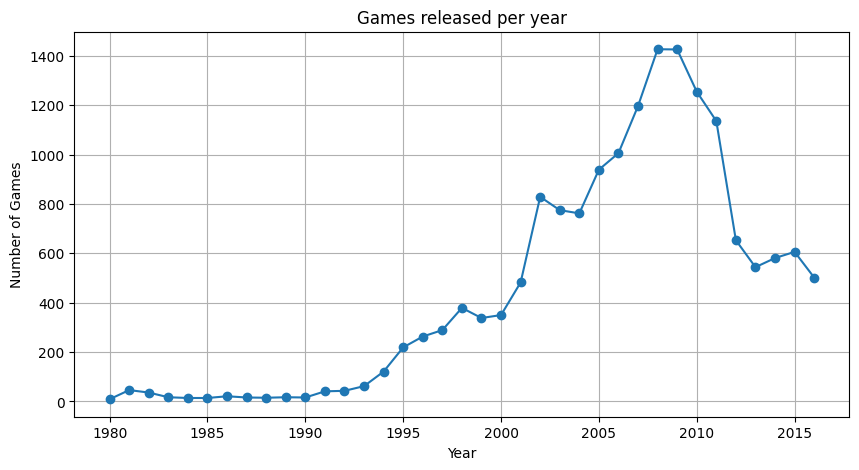

In [77]:
filtered_games = df_games[df_games['year_of_release'] > 0]
games_per_year = filtered_games['year_of_release'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
games_per_year.plot(kind='line', marker='o')
plt.title('Games released per year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

# Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

<div class="alert alert-block alert-info">
NOTA: Los juegos que se muestran como lanzados en el año 0, son aquellos en los cuales el DF original tenía valores ausentes, es decir no se tiene información sobre su año de lanzamiento.
    
¿Son significativos los datos de cada período? 
    
Sí, los datos de cada período son significativos ya que muestran tendencias para cada hito en la historia de los videojuegos. Por ejemplo, en el año 2000 con el lanzamiento de la PS2 (consola más vendida en la historia), se evidencia que en los años venideros el lanzamiento de consolas fue en aumento, hasta el año 2006, donde se muestra otro hito con el estreno de las consolas PS3 y Nintendo Wii (otras de las consolas más vendidas de la historia).
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Pero mostrarlo de esta forma no es buena práctica y considerando que son valores por cada año lo mejor sería mostrar una gráfica de líneas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Excelente, ahora es mucho más sencillo analizar esta parte
</div>

### Total de ventas por plataforma

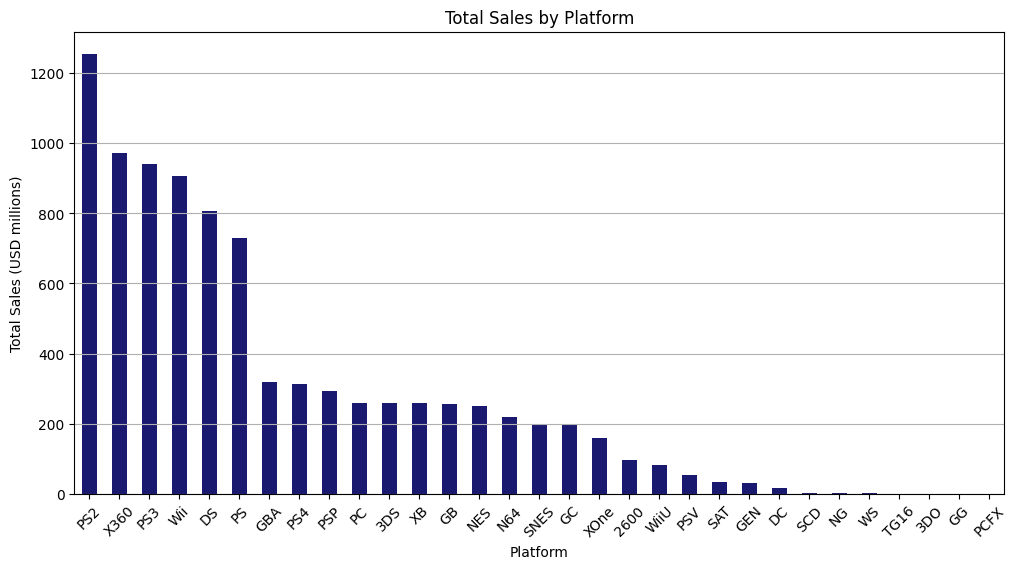

In [78]:
total_sales_by_platform = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(12, 6))
total_sales_by_platform.plot(kind='bar', color='midnightblue')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Elegir las plataformas con las mayores ventas totales.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Esta parte también debería ser ilustrada con una gráfica ya que mostrar sólo resultados numéricos es más complicado de analizar
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Siempre procura generar gráficas para explicar mejor los análisis
</div>

### Distribución de ventas por plataforma y año

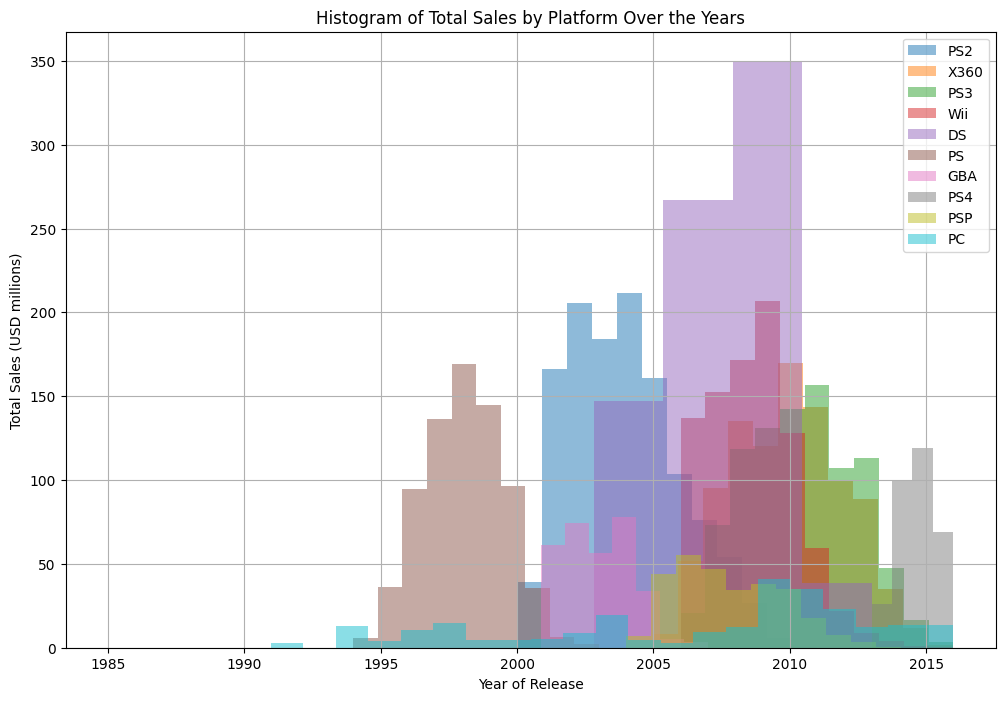

In [79]:
top_platforms = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))

for platform in top_platforms:
    platform_df = df_games[(df_games['platform'] == platform) & (df_games['year_of_release'] > 0)]
    platform_sales_by_year = platform_df.groupby('year_of_release')['total_sales'].sum()
    plt.hist(platform_sales_by_year.index, weights=platform_sales_by_year.values, bins=len(platform_sales_by_year.index), alpha=0.5, label=platform)

plt.title('Histogram of Total Sales by Platform Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (USD millions)')
plt.legend()
plt.grid(True)
plt.show()
    
# Construir una distribución basada en los datos de cada año.

<div class="alert alert-block alert-info">
NOTA: Para construir el histograma NO se tuvieron en cuenta los juegos sin fecha de lanzamiento, es decir aquellas con valor 0 en su año de lanzamiento, ya que no se podía observar con claridad la distribución de los datos.
</div>

### Tiempo de aparición y desaparición de plataformas

In [80]:
df_filtered = df_games[df_games['year_of_release'] > 0]

platforms_no_sales = df_filtered.groupby('platform')['year_of_release'].max().sort_values()
print("Plataformas que ya no tienen ventas:")
print(platforms_no_sales.head(20))

df_filtered = df_games[df_games['year_of_release'] > 0]

platform_lifecycle = df_filtered.groupby('platform').agg({'year_of_release': ['min', 'max']})
platform_lifecycle['lifetime'] = platform_lifecycle['year_of_release']['max'] - platform_lifecycle['year_of_release']['min']
platform_lifecycle = platform_lifecycle.sort_values(by=('year_of_release', 'max'))

print("Tiempo de aparición y desaparición de las plataformas:")
print(platform_lifecycle)

# Buscar las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Plataformas que ya no tienen ventas:
platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
Name: year_of_release, dtype: int64
Tiempo de aparición y desaparición de las plataformas:
         year_of_release       lifetime
                     min   max         
platform                               
2600                1980  1989        9
GG                  1992  1992        0
SCD                 1993  1994        1
GEN                 1990  1994        4
NES                 1983  1994       11
3DO                 1994  1995        1
TG16                1995  1995        0
NG                  1993  1996        3
PCFX                1996  1996        0
SNES                1990  1999        9
SAT                 1994  1999        5
WS                  1999  2001        2
GB 

<div class="alert alert-block alert-info">
Se tomarán los datos a partir del año 2011 hacia la actualidad, entendiendo esto como un rango de datos prudente (5 años atrás) para el análisis y la construcción del modelo para 2017. 
Es decir se analizarán los datos para las siguientes consolas:
    
PS2     2011
    
DS      2013
    
PSP     2015
    
PS3     2016
    
PS4     2016
    
PSV     2016
    
3DS     2016
    
Wii     2016
    
WiiU    2016
    
X360    2016
    
PC      2016
    
XOne    2016    

##Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
</div>

### Plataformas líderes en ventas

year_of_release    2011    2012    2013    2014    2015   2016
platform                                                      
3DS               63.20   51.36   56.57   43.76   27.78  15.14
DS                26.18   11.01    1.54     NaN     NaN    NaN
PC                35.03   23.22   12.38   13.28    8.52   5.25
PS2                0.45     NaN     NaN     NaN     NaN    NaN
PS3              156.78  107.36  113.25   47.76   16.82   3.60
PS4                 NaN     NaN   25.99  100.00  118.90  69.25
PSP               17.82    7.69    3.14    0.24    0.12    NaN
PSV                4.63   16.19   10.59   11.90    6.25   4.25
Wii               59.65   21.71    8.59    3.75    1.14   0.18
WiiU                NaN   17.56   21.65   22.03   16.35   4.60
X360             143.84   99.74   88.58   34.74   11.96   1.52
XOne                NaN     NaN   18.96   54.07   60.14  26.15


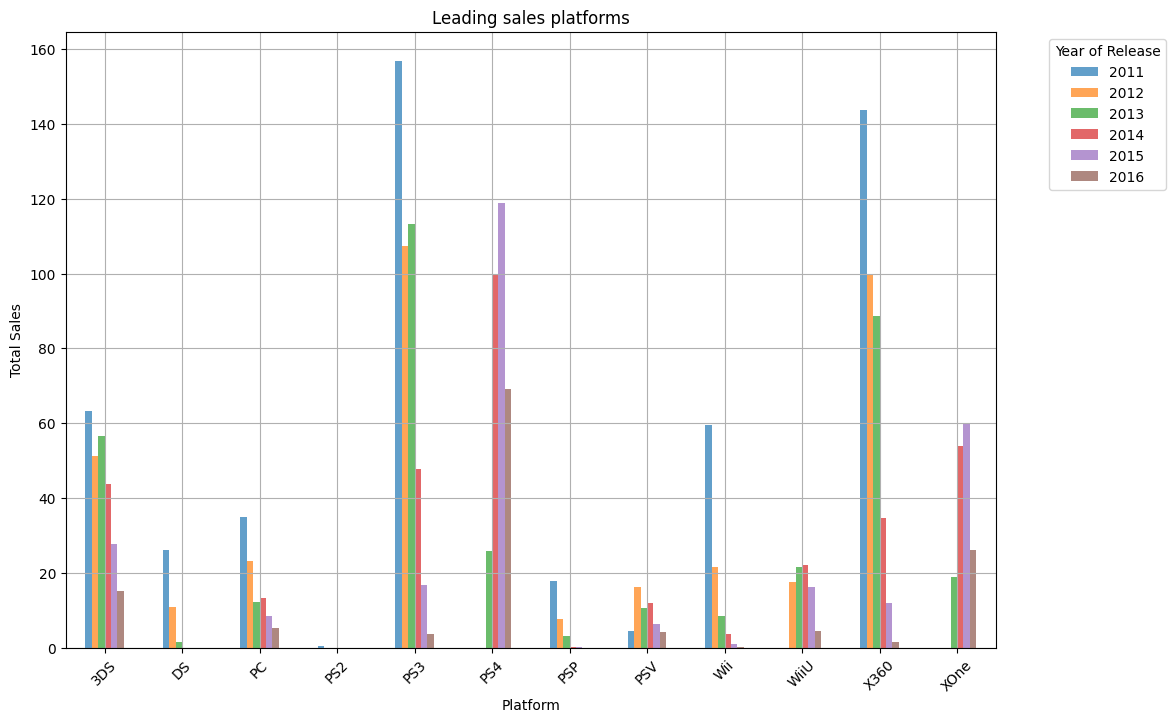

In [81]:
df_games_since_2011 = df_games[df_games['year_of_release'] >= 2011]

pivot_data = df_games_since_2011.pivot_table(index='platform',
                            columns='year_of_release',
                            values='total_sales',
                            aggfunc='sum'
                           )
df_pivot = pivot_data
print(df_pivot)
pivot_data.plot(kind = "bar", figsize = (12, 8), alpha = 0.7)
plt.title("Leading sales platforms")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.legend(title="Year of release")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Year of Release", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

<div class="alert alert-block alert-info">
En general, las 12 plataformas se han mantenido en el tiempo ( a excepción del PS2, el cual tuvo transición al PS3, lo cual se evidencia en el total de ventas por consola a partir del 2012).

Para el anális de la campaña 2017, las plataformas líderes en ventas son: PS3, PS4, X360, XOne, PC, PSV, WiiU, 3DS, ya que muestran aumento en ventas o se han mantenido en el tiempo,estas son potencialmente rentables.
</div>

<Figure size 1400x800 with 0 Axes>

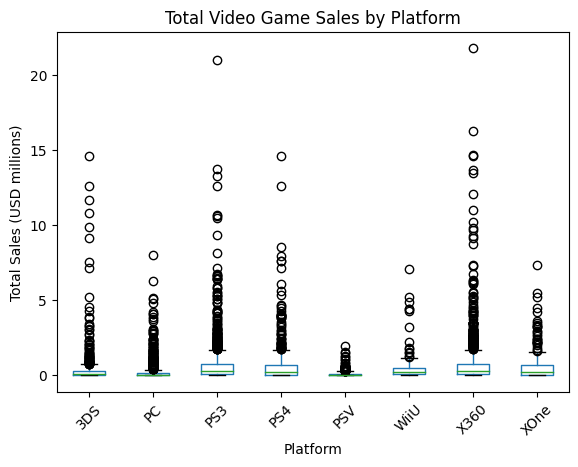

In [82]:
filtered_data = df_games[df_games['platform'].isin(['PS3', 'PS4', 'X360', 'XOne', 'PC', 'PSV', 'WiiU', '3DS'])]
plt.figure(figsize=(14, 8))
filtered_data.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Total Video Game Sales by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD millions)')
plt.xticks(rotation=45)
plt.show()

#Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

<div class="alert alert-block alert-info">

1. Variabilidad de las ventas:

El diagrama muestra que hay una notable variabilidad en las ventas totales entre las ocho plataformas. Algunas plataformas tienen una dispersión de ventas mucho mayor que otras.

2. Mediana de ventas:

Las líneas horizontales dentro de cada caja representan la mediana de las ventas totales. Se observa que las plataformas como PS4, X360 y XOne tienen medianas de ventas más altas en comparación con otras plataformas como PSV y WiiU.

3. Distribución de ventas:

La distancia entre el primer y tercer cuartil da una idea de la distribución de las ventas. Por ejemplo, las plataformas PS4 y X360 tienen cajas más estrechas, indicando una menor variabilidad en las ventas dentro del rango intercuartil (IQR).

4. Valores atípicos:

Se pueden ver varios valores atípicos representados por puntos fuera de las cajas y los bigotes. Estos puntos indican juegos con ventas excepcionalmente altas o bajas en comparación con el resto de los juegos en esa plataforma. Por ejemplo, PS4 y XOne tienen algunos outliers que indican juegos con ventas extremadamente altas.

5. Comparación de Plataformas:

En general, las plataformas PS4, X360 y XOne parecen tener un desempeño mejor en términos de ventas totales, con medianas y rangos de ventas más altos. Las plataformas PSV y WiiU tienen medianas de ventas más bajas y una menor dispersión de ventas.

</div>

### Reseñas de críticos y usuarios

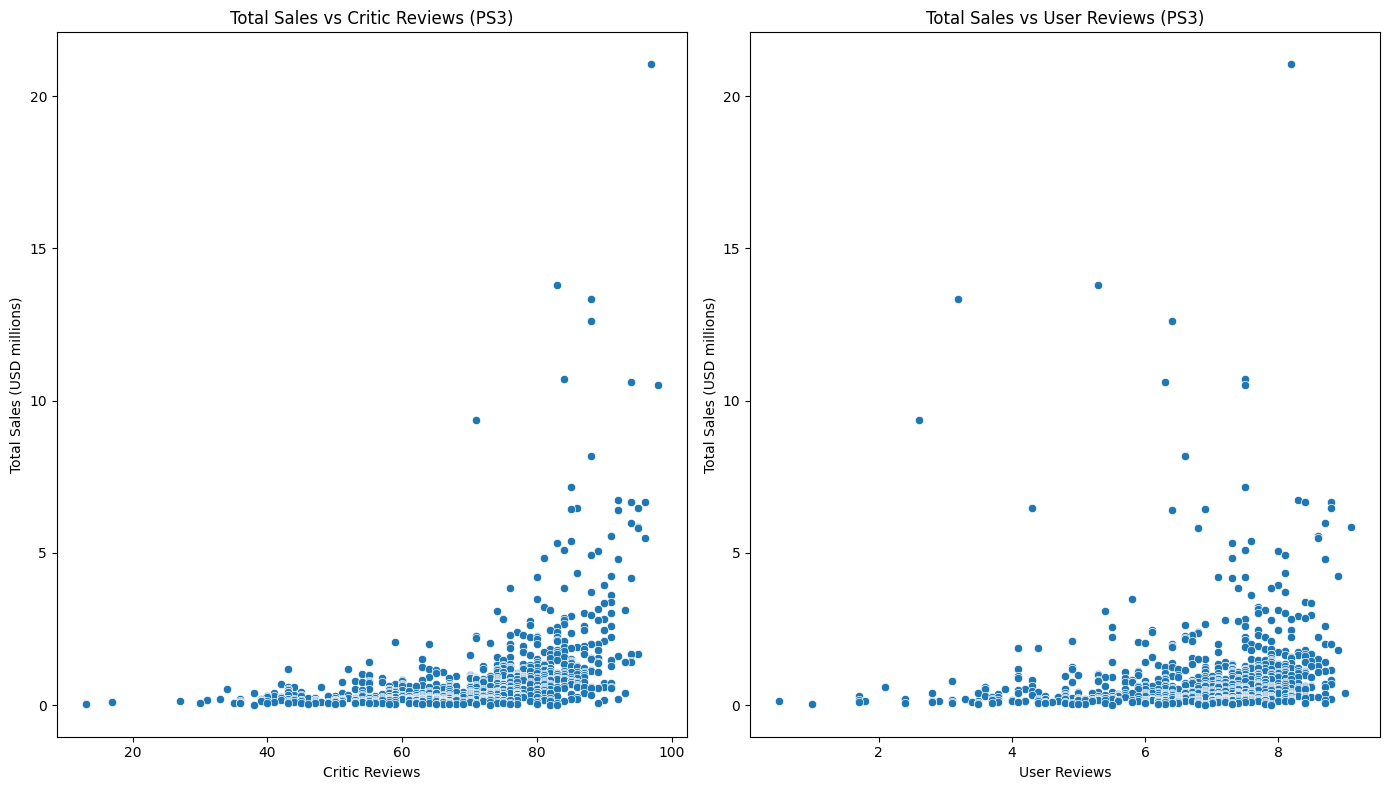

In [83]:
ps3_data = df_games[df_games["platform"] == "PS3"]
ps3_data = ps3_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

ps3_data['critic_score'] = pd.to_numeric(ps3_data['critic_score'], errors='coerce')
ps3_data['user_score'] = pd.to_numeric(ps3_data['user_score'], errors='coerce')

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps3_data, x='critic_score', y='total_sales')
plt.title('Total Sales vs Critic Reviews (PS3)')
plt.xlabel('Critic Reviews')
plt.ylabel('Total Sales (USD millions)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps3_data, x='user_score', y='total_sales')
plt.title('Total Sales vs User Reviews (PS3)')
plt.xlabel('User Reviews')
plt.ylabel('Total Sales (USD millions)')

plt.tight_layout()
plt.show()

#Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [84]:
critic_correlation = ps3_data['critic_score'].corr(ps3_data['total_sales'])
user_correlation = ps3_data['user_score'].corr(ps3_data['total_sales'])

print(f'Correlación entre reseñas de críticos y ventas globales: {critic_correlation:.4f}')
print(f'Correlación entre reseñas de usuarios y ventas globales: {user_correlation:.4f}')

#Calcular correlaciones.

Correlación entre reseñas de críticos y ventas globales: 0.4323
Correlación entre reseñas de usuarios y ventas globales: 0.1433


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien analizada las correlaciones entre las diferentes variables, siempre es importante revisar que puede estar afectando a otro punto del análisis
</div>

<div class="alert alert-block alert-info">
Observaciones:

Para construir los gráficos de dispersión y para calcular la correlación entre las ventas y las críticas, se escogió la plataforma PS3 y se realizaron los siguientes cambios: 

1. Se convirtieron los datos de las columnas critic_score y user_score detipo object a tipo float.
2. Se eliminaron los valores ausentes de las columnas critic_score y user_score.

</div>

<div class="alert alert-block alert-info">

Conclusiones:
    
1. Gráfico de Ventas Totales vs Reseñas de Críticos:

Se evidencia una tendencia positiva entre las ventas totales y las reseñas de críticos. Esto significa que a medida que las reseñas de críticos aumentan, las ventas globales también tienden a aumentar. Los juegos con mejores reseñas de críticos suelen tener mayores ventas.

Correlación: La correlación calculada entre las reseñas de críticos y las ventas totales es positiva con un valor medio de 0.42. Esto sugiere que las críticas profesionales tienen una influencia medianamente significativa en las ventas de los juegos de PS3.

2. Gráfico de Ventas Totales vs Reseñas de Usuarios:

No se observa una correlación clara entre las ventas totales y las reseñas de usuarios. Las ventas están más distribuidas a lo largo de diferentes puntuaciones de reseñas de usuarios.

Correlación: La correlación calculada entre las reseñas de usuarios y las ventas totales es más débil comparada con la de las reseñas de críticos. Esto sugiere que las reseñas de usuarios no tienen un impacto tan fuerte en las ventas como las críticas de los profesionales.
    
</div>

### Ventas en otras plataformas

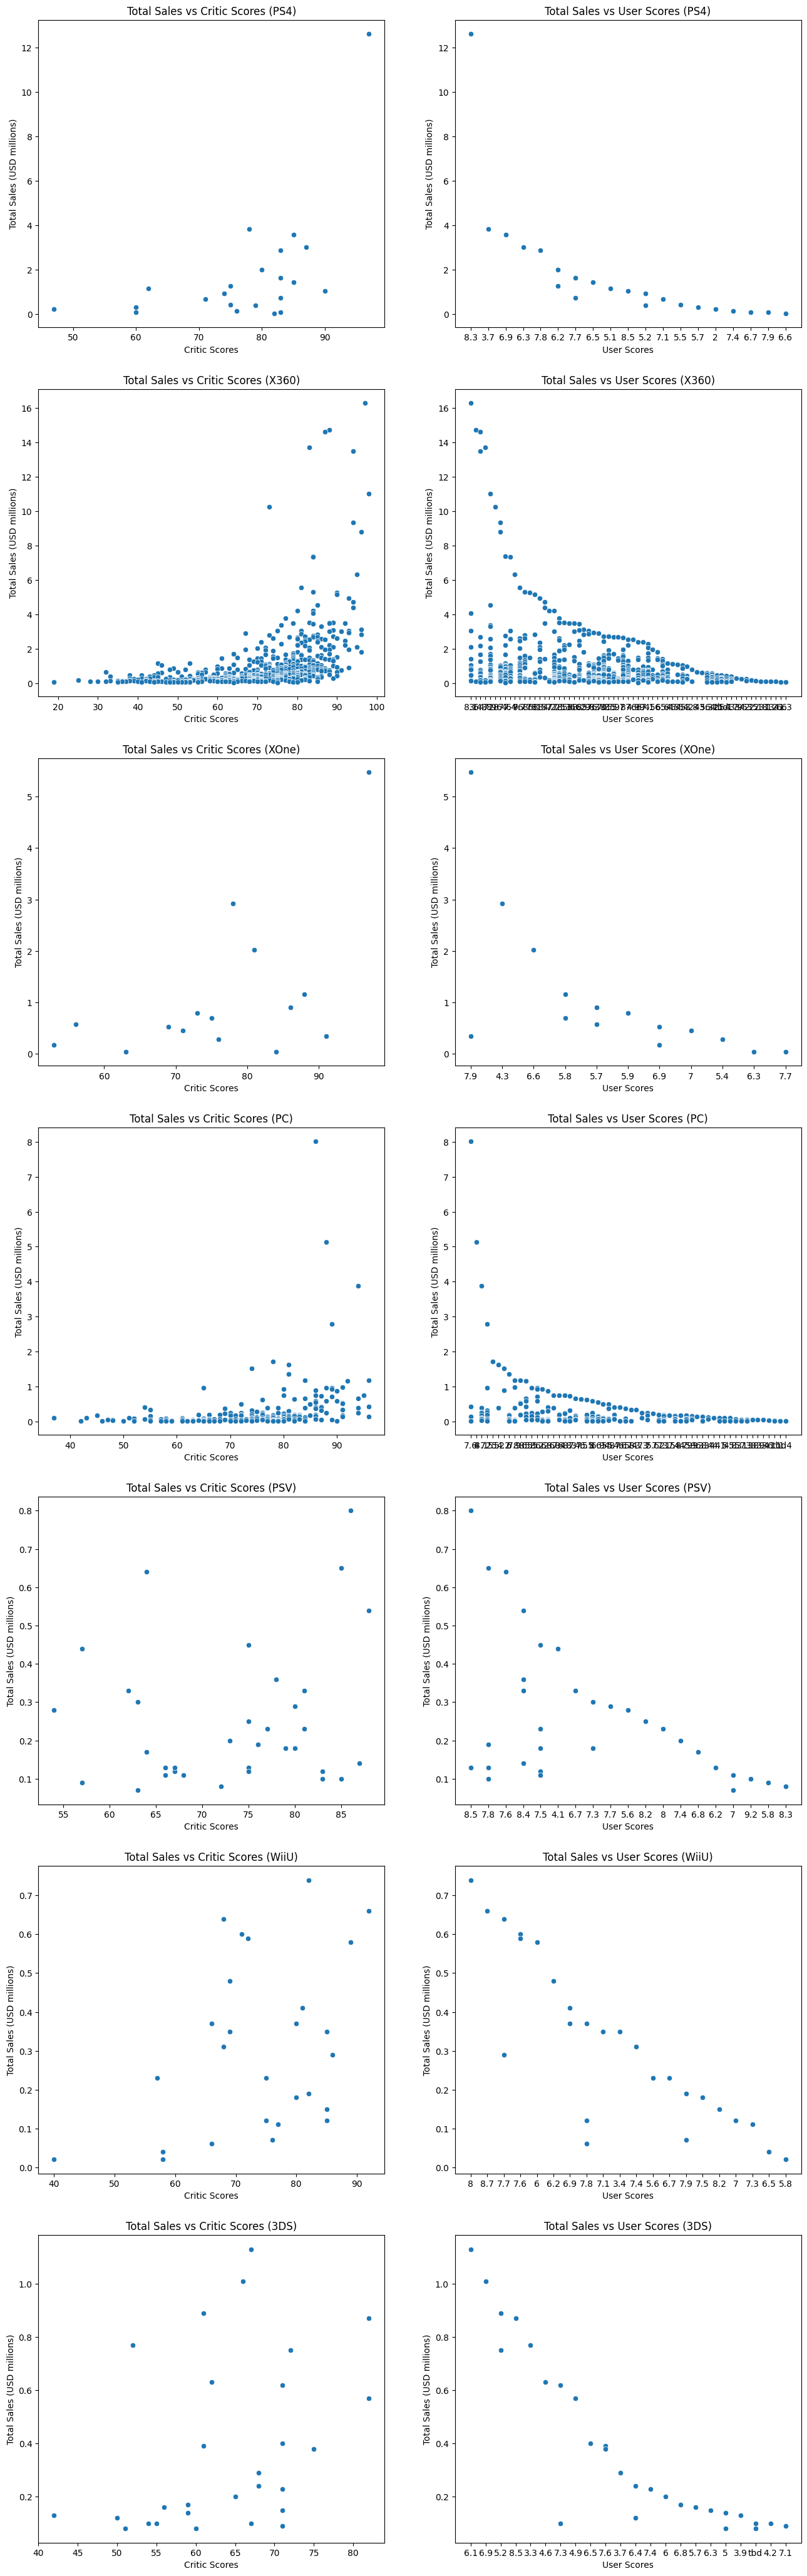

In [85]:
df_games = df_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])
filtered_platforms = ['PS4', 'X360', 'XOne', 'PC', 'PSV', 'WiiU', '3DS']
multi_platform_games = df_games[df_games['name'].isin(ps3_data['name'])]

fig, axes = plt.subplots(len(filtered_platforms), 2, figsize=(14, 6 * len(filtered_platforms)))
fig.tight_layout(pad=5.0)

for i, platform in enumerate(filtered_platforms):
    platform_data = multi_platform_games[multi_platform_games['platform'] == platform]
    
    
    sns.scatterplot(data=platform_data, x='critic_score', y='total_sales', ax=axes[i, 0])
    axes[i, 0].set_title(f'Total Sales vs Critic Scores ({platform})')
    axes[i, 0].set_xlabel('Critic Scores')
    axes[i, 0].set_ylabel('Total Sales (USD millions)')
    
    
    sns.scatterplot(data=platform_data, x='user_score', y='total_sales', ax=axes[i, 1])
    axes[i, 1].set_title(f'Total Sales vs User Scores ({platform})')
    axes[i, 1].set_xlabel('User Scores')
    axes[i, 1].set_ylabel('Total Sales (USD millions)')

plt.show()

#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

<div class="alert alert-block alert-info">
Conclusiones:

1. Se evidencia que para la paltaforma X360, el gráfico es muy similar al de PS3, lo que podría dar la idea de que estas consolas son rivales y las reseñas tanto de usuarios como de críticos juegan un rol similar al momento de comprar juegos en estas plataformas.
2. Para la consola PC se observa una dispersión medianamente similar a las de PS3 y X360,aunque no tan marcada, lo que indica que las reseñas tanto de críticos comode usuarios no es tan relevante para los usuarios que juegan en PC.
3. Para las demás consolas como PSV, XOne, PS4, WiiU y 3DS, se observa alguna acumulación de puntos, mas no es tan significativa como para las demás consolas estudiadas, no se podría concluir claramente la correlación entre las reseñas y las ventas de juegos en estas plataformas.
</div>

### Ventas de juegos por género

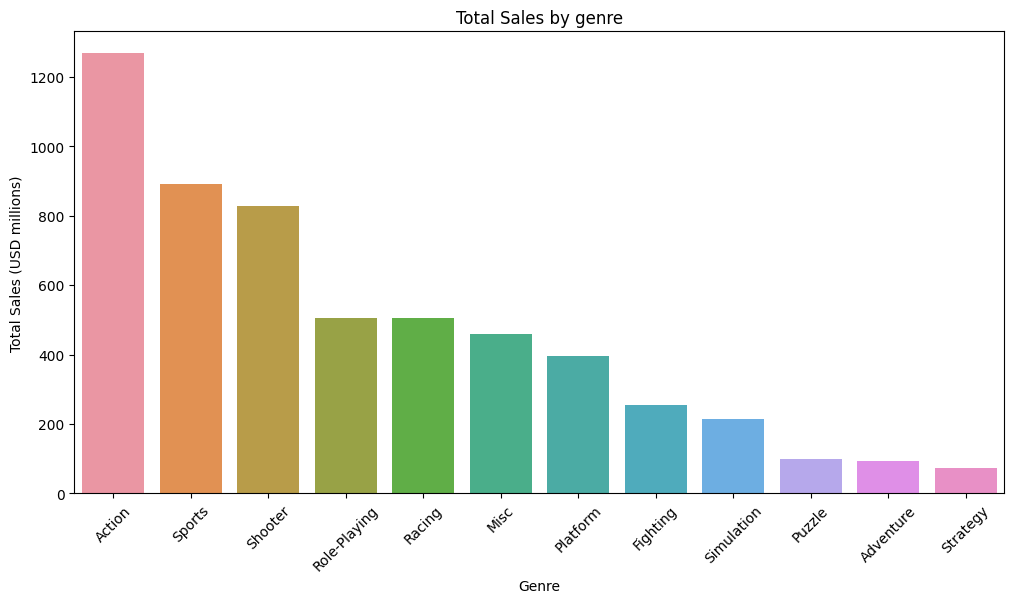

In [86]:
genre_sales = df_games.groupby('genre')['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='total_sales', order=genre_sales.sort_values('total_sales', ascending=False)['genre'])
plt.title('Total Sales by genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (USD millions)')
plt.xticks(rotation=45)
plt.show()

#Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

<div class="alert alert-block alert-info">
    
1. Géneros más rentables:

-Acción: Este género es claramente el más rentable, con ventas que superan los 1200 millones de dólares. Esto sugiere que los juegos de acción son bastante populares y son atractivos para los jugadores.

-Deportes y Shooter: Ambos géneros también tienen ventas muy altas, superando los 800 millones de dólares. Estos géneros han sido tradicionalmente populares y continúan siendo exitosos en el mercado.

2. Géneros con ventas altas:

-Rol, Carreras, Misceláneo y Plataforma: Estos géneros tienen ventas globales entre 400 y 600 millones de dólares, lo que indica que también tienen una buena base de jugadores y pueden ser considerados géneros exitosos.

3. Géneros con ventas moderadas:

-Lucha y Simulación: Estos géneros tienen ventas globales entre 200 y 400 millones de dólares. Aunque no son tan exitosos como los géneros más rentables, todavía tienen una presencia significativa en el mercado.

4. Géneros con ventas bajas:

Puzzle, Aventura y Estrategia: Estos géneros tienen las ventas más bajas, todas por debajo de los 200 millones de dólares. Esto sugiere que estos géneros son menos populares o tienen un atractivo más de nicho en comparación con los géneros más vendidos.
</div>

## Crea un perfil de usuario para cada región

### Cinco plataformas principales por región

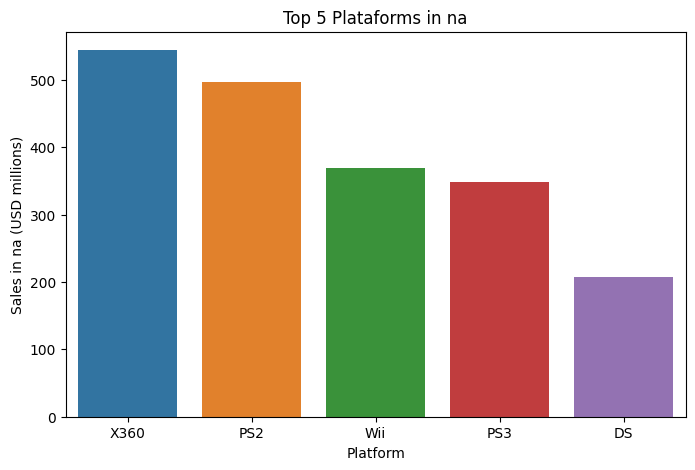

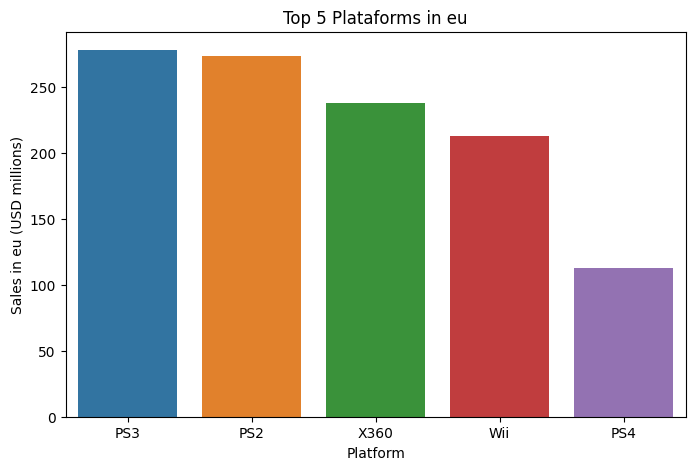

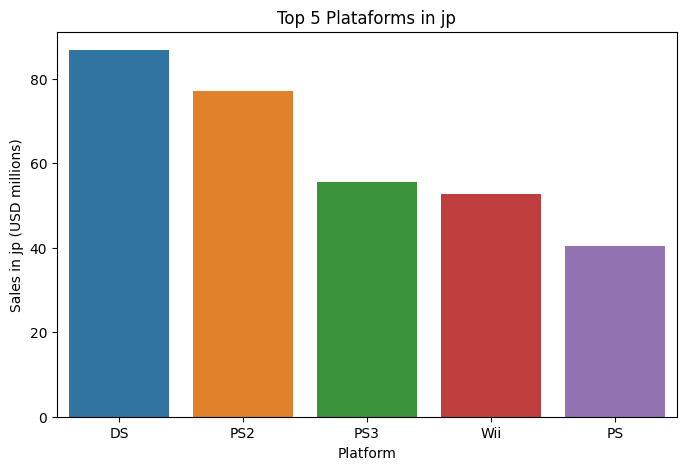

In [87]:
region_sales = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

top_platforms_na = region_sales.nlargest(5, 'na_sales').reset_index(drop=True)
top_platforms_eu = region_sales.nlargest(5, 'eu_sales').reset_index(drop=True)
top_platforms_jp = region_sales.nlargest(5, 'jp_sales').reset_index(drop=True)

def plot_top_platforms(region, top_platforms, sales_column):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='platform', y=sales_column, data=top_platforms)
    plt.title(f'Top 5 Plataforms in {region}')
    plt.xlabel('Platform')
    plt.ylabel(f'Sales in {region} (USD millions)')
    plt.show()
    
plot_top_platforms('na', top_platforms_na, 'na_sales')
plot_top_platforms('eu', top_platforms_eu, 'eu_sales')
plot_top_platforms('jp', top_platforms_jp, 'jp_sales')

#Para cada región (NA, UE, JP) determina: Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [88]:
region_sales['na_market_share'] = region_sales['na_sales'] / region_sales['na_sales'].sum()
region_sales['eu_market_share'] = region_sales['eu_sales'] / region_sales['eu_sales'].sum()
region_sales['jp_market_share'] = region_sales['jp_sales'] / region_sales['jp_sales'].sum()

top_platforms_na['na_market_share'] = top_platforms_na['na_sales'] / region_sales['na_sales'].sum()
top_platforms_eu['eu_market_share'] = top_platforms_eu['eu_sales'] / region_sales['eu_sales'].sum()
top_platforms_jp['jp_market_share'] = top_platforms_jp['jp_sales'] / region_sales['jp_sales'].sum()

print("Cuotas de Mercado en NA:")
print(top_platforms_na[['platform', 'na_market_share']])
print("\nCuotas de Mercado en EU:")
print(top_platforms_eu[['platform', 'eu_market_share']])
print("\nCuotas de Mercado en JP:")
print(top_platforms_jp[['platform', 'jp_market_share']])

#Para cada región (NA, UE, JP) determina: Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Cuotas de Mercado en NA:
  platform  na_market_share
0     X360         0.190129
1      PS2         0.173648
2      Wii         0.128732
3      PS3         0.121484
4       DS         0.072245

Cuotas de Mercado en EU:
  platform  eu_market_share
0      PS3         0.164357
1      PS2         0.161740
2     X360         0.140588
3      Wii         0.125616
4      PS4         0.066564

Cuotas de Mercado en JP:
  platform  jp_market_share
0       DS         0.194228
1      PS2         0.172577
2      PS3         0.124082
3      Wii         0.118126
4       PS         0.090408


<div class="alert alert-block alert-info">
Variaciones en Cuotas de Mercado:

1. Norteamérica:

X360: Tiene la mayor cuota de mercado en NA con aproximadamente el 19%. Esto indica que la Xbox 360 es la plataforma más popular en esta región.

PS2: Está cerca con un 17.36% de la cuota de mercado, mostrando que sigue siendo una plataforma fuerte incluso después de varios años desde su lanzamiento.

Wii: Ocupa la tercera posición con un 12.87%, lo que refleja su éxito entre los jugadores norteamericanos.

PS3: Tiene una cuota de mercado del 12.15%, mostrando su popularidad pero no tan alta como la de la Xbox 360.

DS: Con un 7.22%, la Nintendo DS también tiene una presencia notable en NA.

2. Europa:

PS3: Es la plataforma dominante en Europa con una cuota de mercado del 16.44%, lo que sugiere que es muy popular en Europa.

PS2: Muy cerca de la PS3 con una cuota de mercado del 16.17%, lo que indica que sigue siendo relevante en Europa.

X360 (Xbox 360): Con una cuota del 14.86%, la Xbox 360 también es popular en esta región, aunque no tanto como en NA.

Wii: Con un 12.65% de cuota de mercado, la Wii también tiene éxito en Europa.

PS4 (PlayStation 4): A pesar de que fue lanzada en 2013, tiene una cuota de mercado del 6.66%, indicando un buen inicio en Europa.

3. Japón:

DS: Es la plataforma más popular en Japón con una cuota de mercado del 19.42%, lo que refleja la fuerte presencia de Nintendo en esta región.

PS2: Con una cuota del 17.26%, muestra que sigue siendo muy relevante en Japón.

PS3: Tiene una cuota de mercado del 12.41%, indicando su popularidad entre los jugadores japoneses.

Wii: Con un 11.81% de cuota de mercado, la Wii también tiene éxito en Japón.

PS: La primera PlayStation todavía mantiene una cuota del 9.05%, lo que muestra su legado duradero en Japón.
</div>

### Cinco géneros principales por región

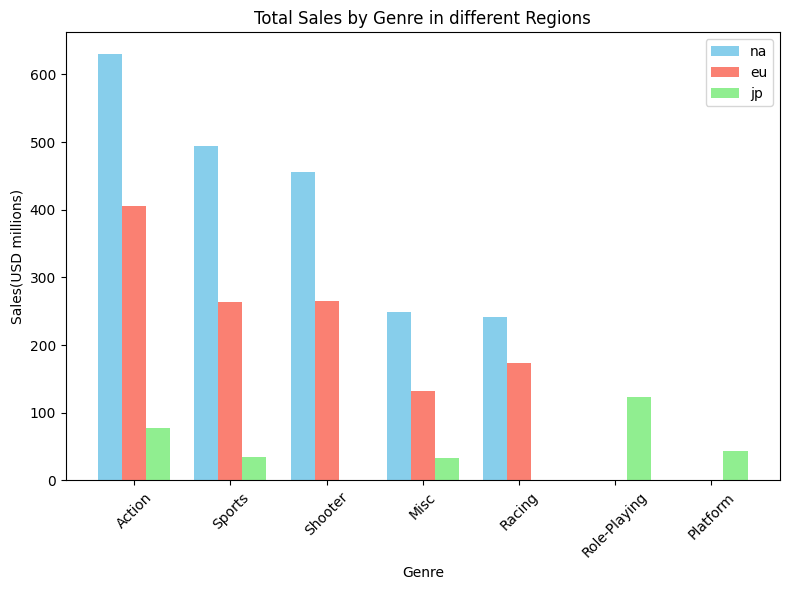

In [89]:
na_genre_sales = df_games.groupby('genre')['na_sales'].sum().reset_index()
eu_genre_sales = df_games.groupby('genre')['eu_sales'].sum().reset_index()
jp_genre_sales = df_games.groupby('genre')['jp_sales'].sum().reset_index()

top_na_genres = na_genre_sales.nlargest(5, 'na_sales').reset_index(drop=True)
top_eu_genres = eu_genre_sales.nlargest(5, 'eu_sales').reset_index(drop=True)
top_jp_genres = jp_genre_sales.nlargest(5, 'jp_sales').reset_index(drop=True)

combined_data = pd.concat([
    top_na_genres.set_index('genre')['na_sales'],
    top_eu_genres.set_index('genre')['eu_sales'],
    top_jp_genres.set_index('genre')['jp_sales']], axis=1).reset_index().fillna(0)

plt.figure(figsize=(8, 6))
bar_width = 0.25
index = range(len(combined_data))

plt.bar(index, combined_data['na_sales'], bar_width, label='na', color='skyblue')
plt.bar([i + bar_width for i in index], combined_data['eu_sales'], bar_width, label='eu', color='salmon')
plt.bar([i + 2 * bar_width for i in index], combined_data['jp_sales'], bar_width, label='jp', color='lightgreen')

plt.xlabel('Genre')
plt.ylabel('Sales(USD millions)')
plt.title('Total Sales by Genre in different Regions')
plt.xticks([i + bar_width for i in index], combined_data['genre'])
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Los cinco géneros principales. Explica la diferencia.

<div class="alert alert-block alert-info">
1. Géneros con ventas más altas:

1.1. Acción: Es el género más vendido en Norteamérica y Europa, con ventas significativamente más altas en estas regiones en comparación con Japón.

1.2. Deportes: También tiene ventas muy altas en Norteamérica y Europa, aunque un poco inferiores a las de los juegos de acción. En Japón, las ventas de este género son significativamente más bajas.

1.3. Shooter: Este género tiene ventas altas en Norteamérica y Europa, pero casi ninguna venta en Japón.

2. Géneros con Ventas Moderadas:

2.1. Rol (RPG): Es el género más vendido en Japón, superando a otros géneros en esta región. En Norteamérica y Europa, las ventas de RPG son mucho más bajas en comparación con Japón.

2.2. Carreras: Tiene ventas moderadas en Norteamérica y Europa, con ventas mínimas en Japón.

3. Géneros con Ventas Bajas:

3.1. Plataforma: Este género tiene ventas relativamente altas en Japón en comparación con Norteamérica y Europa, donde las ventas son bastante bajas.

3.2. Misceláneo: Tiene ventas moderadas en Norteamérica y Europa, pero ventas muy bajas en Japón.

4. Análisis de Preferencias Regionales:

4.1. Norteamérica (NA):

Acción y Shooter: Los géneros de acción y shooter dominan el mercado norteamericano, lo que sugiere que los jugadores de esta región prefieren juegos intensos y de ritmo rápido.

Deportes: Este género también es muy popular, probablemente debido al gran interés en deportes como el fútbol americano, el baloncesto y el béisbol.

4.2. Europa (EU):

Acción y Deportes: Similar a Norteamérica, los géneros de acción y deportes son muy populares en Europa.

Shooter: También tiene una presencia significativa en el mercado europeo.

4.3. Japón (JP):

Rol (RPG) y Plataforma: Los juegos de rol y plataforma dominan en Japón.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo analizando las ventas por plataforma y por género, tratándose de videojuegos, analizarlo de esta forma da muy buenos detalles en tu análisis
</div>

### Determinar si las clasificaciones de ESRB afectan a las ventas en regiones individuales

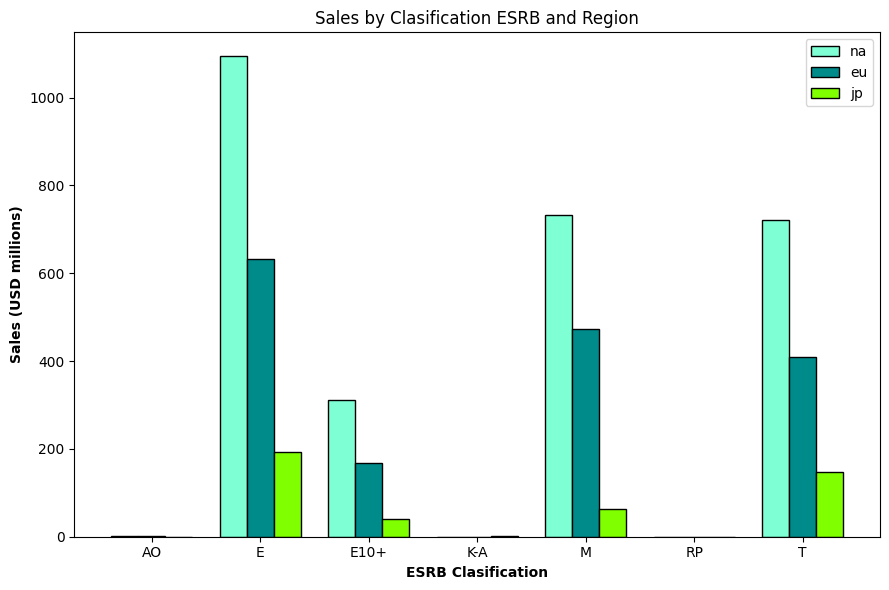

In [90]:
df_games_filtered_by_esrb = df_games[['rating', 'na_sales', 'eu_sales', 'jp_sales']]

sales_by_esrb = df_games_filtered_by_esrb.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

fig, ax = plt.subplots(figsize=(9, 6))

bar_width = 0.25
r1 = range(len(sales_by_esrb))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

ax.bar(r1, sales_by_esrb['na_sales'], color='aquamarine', width=bar_width, edgecolor='black', label='na')
ax.bar(r2, sales_by_esrb['eu_sales'], color='darkcyan', width=bar_width, edgecolor='black', label='eu')
ax.bar(r3, sales_by_esrb['jp_sales'], color='chartreuse', width=bar_width, edgecolor='black', label='jp')

ax.set_xlabel('ESRB Clasification', fontweight='bold')
ax.set_ylabel('Sales (USD millions)', fontweight='bold')
ax.set_title('Sales by Clasification ESRB and Region')
ax.set_xticks([r + bar_width for r in range(len(sales_by_esrb))])
ax.set_xticklabels(sales_by_esrb['rating'])
ax.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
1. Clasificación "E" (Everyone):

Se evidencias ventas más altas en todas las regiones: La clasificación "E" tiene las ventas más altas en todas las regiones, especialmente en América del Norte, donde supera los 1000 millones de dólares. Esto sugiere que los juegos aptos para todas las edades tienen un atractivo masivo y un público amplio.

Popularidad Global: La alta popularidad de los juegos clasificados como "E" indica que los juegos familiares y accesibles son extremadamente exitosos en todas las regiones.

2. Clasificación "M" (Mature):

Ventas Significativas en NA y EU: Los juegos clasificados como "M" también muestran ventas significativas, con América del Norte nuevamente liderando, seguida de Europa. Esto sugiere que hay una gran demanda de juegos para adultos en estas regiones.

Menor Popularidad en JP: Las ventas de juegos "M" son mucho más bajas en Japón, lo que puede indicar diferencias culturales en las preferencias de entretenimiento.

3. Clasificación "T" (Teen):

Ventas Considerables: La clasificación "T" muestra ventas considerables, con América del Norte liderando, seguida de Europa y Japón. Esto sugiere que los juegos destinados a adolescentes también tienen un mercado sólido, aunque no tan grande como los juegos "E" o "M".

4. Ventas en Japón (JP):

Ventas Generales Más Bajas: Las ventas en Japón son generalmente más bajas en comparación con América del Norte y Europa en todas las clasificaciones de ESRB. Esto podría deberse a una menor penetración de mercado o a diferencias en las preferencias de los jugadores.

5. Clasificaciones AO, K-A y RP:

Ventas Muy Bajas o Nulas: Las clasificaciones AO (Adults Only), K-A (Kids to Adults) y RP (Rating Pending) tienen ventas muy bajas o nulas en todas las regiones. Esto es comprensible, ya que los juegos clasificados como AO son raros y enfrentan restricciones significativas en la distribución, mientras que los juegos con clasificación RP aún no han sido evaluados oficialmente.
</div>

## Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [91]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

xbox_one_ratings = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

print(f"Calificación promedio Xbox One: {xbox_one_ratings.mean()}")
print(f"Calificación promedio PC: {pc_ratings.mean()}")

t_stat, p_value = st.ttest_ind(xbox_one_ratings, pc_ratings)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para decir que las calificaciones promedio para Xbox One y PC son diferentes.")
    
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Calificación promedio Xbox One: 6.538181818181818
Calificación promedio PC: 7.03968705547653
Estadístico t: -3.8909857493055195
Valor p: 0.00010749396991155507
Rechazamos la hipótesis nula. Las calificaciones promedio para Xbox One y PC son diferentes.


<div class="alert alert-block alert-info">
1. Cómo formulaste las hipótesis nula y alternativa?

Hipótesis Nula (Ho): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Para comparar las calificaciones promedio de los usuarios entre las dos plataformas, se utilizó la prueba t de Student para muestras independientes.

Se utilizó un nivel de significancia alpha de 0.05.

2. Interpretación de los Resultados:

Calificaciones Promedio:

Xbox One: 6.54

PC: 7.04

Estadístico t: -3.89

Valor p: 0.000107

Conclusión:

El valor p es mucho menor que el nivel de significancia comúnmente usado (α = 0.05). Esto significa que la probabilidad de obtener un resultado como este, dado que las calificaciones promedio fueran realmente iguales, es extremadamente baja. Por lo tanto, podemos rechazar la hipótesis nula (H0) con confianza y asumir la hipótesis alternativa (H1).
</div>

In [92]:
action_scores = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

print(f"Calificación promedio de usuarios para el género de Acción: {action_scores.mean()}")
print(f"Calificación promedio de usuarios para el género de Deportes: {sports_scores.mean()}")

t_stat, p_value = st.ttest_ind(action_scores, sports_scores)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.")
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Calificación promedio de usuarios para el género de Acción: 7.094215861657722
Calificación promedio de usuarios para el género de Deportes: 7.105652620760534
Estadístico t: -0.20027262532897672
Valor p: 0.8412827497852923
No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.


<div class="alert alert-block alert-info">
1. Cómo formulaste las hipótesis nula y alternativa?

Hipótesis Nula (Ho): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Para comparar las calificaciones promedio de los usuarios para los géneros Acción y Deportes, se utilizó la prueba t de Student para muestras independientes.

Se utilizó un nivel de significancia alpha de 0.05.

2. Interpretación de los Resultados

Estadístico t: -0.20

Valor p: 0.841

Conclusión
El valor p es mucho mayor que el nivel de significancia comúnmente usado (α = 0.05). Esto significa que la probabilidad de obtener un resultado como este, dado que las calificaciones promedio fueran realmente diferentes, es bastante alta. Por lo tanto, no tenemos suficiente evidencia para rechazar la hipótesis nula (Ho).
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una excelente aplicación de las pruebas de hipótesis para demostrar si las diferencias en tus comparaciones son realmente significantes y no plantear conclusiones sin fundamento de los datos, te felicito!
</div>

## Conclusión General

<div class="alert alert-block alert-info">
Conclusiones:

1. Período de Datos:

Se decidió analizar los datos a partir del año 2011 hacia la actualidad (2016) para un rango de 5 años, considerando las siguientes consolas: PS2, DS, PSP, PS3, PS4, PSV, 3DS, Wii, WiiU, X360, PC, XOne.

Las 12 plataformas se han mantenido en el tiempo, excepto el PS2 que tuvo una transición al PS3 a partir de 2012.

2. Plataformas Líderes en Ventas:

Para la campaña de 2017, las plataformas líderes en ventas son: PS3, PS4, X360, XOne, PC, PSV, WiiU y 3DS, ya que muestran aumento en ventas o se han mantenido en el tiempo.

3. Variabilidad de Ventas:

Existe una notable variabilidad en las ventas totales entre las ocho plataformas principales. Las plataformas PS4, X360 y XOne tienen medianas de ventas más altas en comparación con PSV y WiiU.

Hay valores atípicos que indican juegos con ventas excepcionalmente altas o bajas en algunas plataformas.

4. Impacto de Reseñas en Ventas:

Reseñas de Críticos: Existe una correlación positiva entre las reseñas de críticos y las ventas globales (correlación de 0.42). Los juegos con mejores reseñas de críticos suelen tener mayores ventas.

Reseñas de Usuarios: No se observa una correlación clara entre las ventas totales y las reseñas de usuarios. Las reseñas de críticos tienen un impacto más fuerte en las ventas.

5. Géneros más Rentables:

Alta Rentabilidad: Acción, Deportes y Shooter son los géneros más rentables, con Acción liderando en ventas globales.

Moderada Rentabilidad: Rol (RPG), Carreras, Misceláneo y Plataforma.

Baja Rentabilidad: Lucha, Simulación, Puzzle, Aventura y Estrategia.

6. Variaciones Regionales en Cuotas de Mercado:

Norteamérica (NA): X360 es la plataforma más popular, seguida de PS2, Wii, PS3 y DS.

Europa (EU): PS3 es la plataforma dominante, seguida de PS2, X360, Wii y PS4.

Japón (JP): DS lidera en Japón, seguida de PS2, PS3, Wii y la primera PlayStation.

7. Preferencias Regionales por Género:

Norteamérica (NA): Acción, Shooter y Deportes son los géneros más populares.

Europa (EU): Acción y Deportes dominan, seguidos por Shooter.

Japón (JP): Rol (RPG) y Plataforma son los géneros más vendidos.

8. Impacto de Clasificaciones ESRB en Ventas:

Clasificación "E" (Everyone): Ventas más altas en todas las regiones.

Clasificación "M" (Mature): Ventas significativas en NA y EU, menos en JP.

Clasificación "T" (Teen): Ventas considerables, especialmente en NA.

Clasificaciones AO, K-A y RP: Ventas muy bajas o nulas en todas las regiones.

9. Pruebas de Hipótesis:

Hipótesis 1: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes (valor p: 0.000107).

Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales (valor p: 0.841).
    
Conclusiones del dataset games del proyecto:
    
1. Se presenta una base de datos con una gran cantidad de valores ausentes en algunas de sus columnas.
    
2. Inicialmente no se hizo un cambio de eliminar valores nulos niconversión de las columnas user score, critic score y rating a número, pero posteriormente se hizo necesario convertir los datos de para poder calcular correlaciones.
    
3. En comparación con los anteriores proyectos, se evidencia un gran cambio frente a la responsabilidad de tomar la decisión sobre los datos relevantes y generar su correspondiente estudio, lo que hace aún más interesante el proyecto de este primer módulo.

4. Se tomaron valores de significancia alpha = 0.05 para probar las hipótesis planteadas.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

En general tienes un muy buen trabajo Daniel, sólo hay dos puntos que tienen oportunidad de mejora que sólo se está mostrando el resultado numérico pero siempre es mejor una gráfica ya que son varios datos numéricos que son más complicados de analizar presentados de esa forma.
</div>

<div class="alert alert-block alert-info">

Respuesta del estudiante (1ra iteración)
    
Hola Patricio, de antemano muchas gracias por tu revisión y comentarios. He corregido los numerales 3.1 y 3.2 tal cual lo sugieres, en el numeral 3.1 generé un gráfico de líneas para las ventas por año y en el numeral 3.2 generé un gráfico de barras para el total de ventas por consola.
    
Creo que es todo, siendo así quedo atento a tus comentarios.
    
Saludos,
    
Daniel R.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Si, muy bien Daniel! Ahora el proyecto es mucho más completo, en esta profesión es importante poder comunicar las cosas de manera sencilla por lo que mostrar sólo resultados numéricos no siempre es la mejor opción y peor cuando son varios resultados en una sola y es ahí donde entran las gráficas, siempre que se pueda generar una gráfica clara hazlo!
    
Saludos!
</div>